# Linear regression with one and multiple variables

## Linear regression with one variable

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [75]:
import os
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [76]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:title={'center':'Raw costs'}, xlabel='Population', ylabel='Profit'>

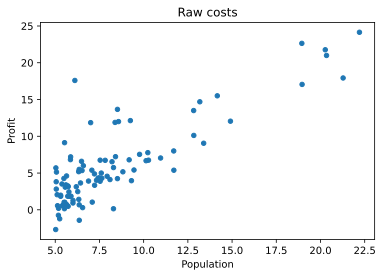

In [77]:
data.plot.scatter(x='Population', y='Profit', title='Raw costs')

In [78]:
data.insert(0, 'Ones', 1)
X = data[['Ones', 'Population']]
y = data['Profit']
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(2))

In [79]:
def hTheta(X, theta):
    return X*theta.transpose()

def cost(X, y, theta):
    return np.sum(np.power(hTheta(X, theta)-y.transpose(),2))/(2*len(X))

In [80]:
def simple_gradient(X, y, theta, alpha, it):
    costsArray = []
    for i in range(0, it):
        matrixOfErrors = np.repeat(hTheta(X, theta) - y.transpose(), theta.size, axis=1)
        theta = theta - alpha*np.sum(np.multiply(matrixOfErrors, X), axis=0)/len(X)
        costsArray.append(cost(X, y, theta))
    return theta, costsArray

In [81]:
alpha = 0.01
it = 1000
(finalTheta, costArray) = simple_gradient(X, y, theta, alpha, it)

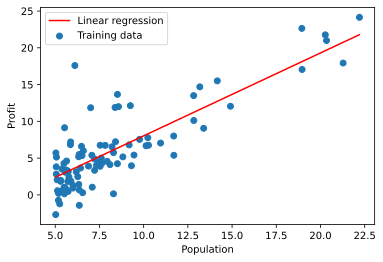

In [82]:
plt.plot(data.Population, hTheta(X, finalTheta), c='red', label='Linear regression')
plt.scatter(data.Population, data.Profit, label='Training data')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc='best')
plt.show()

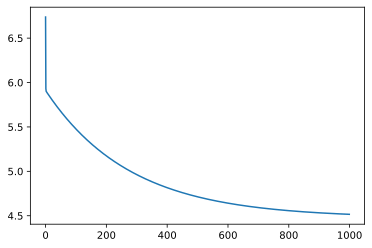

In [83]:
plt.plot(costArray)
plt.show()

## Linear regression with multiple variables

In [85]:
path = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [86]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


<AxesSubplot:title={'center':'Raw costs'}, xlabel='Size', ylabel='Price'>

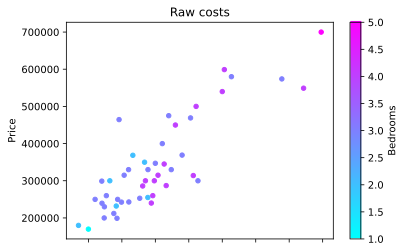

In [87]:
data2.plot.scatter(x='Size', y='Price', c='Bedrooms', cmap='cool', title='Raw costs')

Data normalisation for bedrooms and size

In [88]:
originalBedrooms = data2.Bedrooms
data2.Bedrooms = (data2.Bedrooms - data2.Bedrooms.mean())/ data2.Bedrooms.std()
data2.Size = (data2.Size - data2.Size.mean())/ data2.Size.std()

In [89]:
data2.insert(0, 'Ones', 1)
X = data2[['Ones', 'Size', 'Bedrooms']]
y = data2['Price']
X = np.matrix(X.values)
y = np.matrix(y.values)
theta2 = np.matrix(np.zeros(3))

In [90]:
alpha = 0.01
it = 1000
(finalTheta, costArray) = simple_gradient(X, y, theta2, alpha, it)

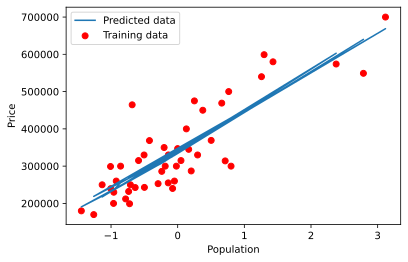

In [91]:
plt.scatter(data2.Size, data2.Price, label='Training data', c='red')
plt.plot(data2.Size, hTheta(X, finalTheta),label='Predicted data')
plt.xlabel('Population')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

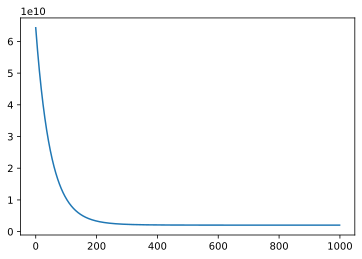

In [92]:
plt.plot(costArray)
plt.show()

## Boston dataset

In [93]:
from sklearn import datasets, linear_model as linm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# get the data
boston_X = boston.data
boston_Y = boston.target

/home/researcher/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [94]:
#niedokonczone
scaler = StandardScaler()
boston_X = scaler.fit_transform(boston_X)
# boston_X = (boston_X - boston_X.mean())/boston_X.std()
boston_Y = (boston_Y - boston_Y.mean())/boston_Y.std()

In [95]:
# # Split into train and test sets (70-30%)
# [boston_X_train, boston_X_test] = np.vsplit(boston_X, [int(0.7*len(boston_X))])
# [boston_Y_train, boston_Y_test] = np.split(boston_Y, [int(0.7*len(boston_Y))])

boston_X_train, boston_X_test, boston_Y_train, boston_Y_test = train_test_split(boston_X, boston_Y, test_size=0.3)


In [96]:
# Creating an object 
regr = linm.LinearRegression()
 
# Learning model on training data
regr.fit(boston_X_train, boston_Y_train)
# Predicting values using test data
Y_predicted = regr.predict(boston_X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_ )
 
#  Residual sum of squares error
error = np.mean((regr.predict(boston_X_test) - boston_Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-0.08534407  0.0970424  -0.03472897  0.08986179 -0.18689624  0.36112576
 -0.03457624 -0.34044375  0.20338206 -0.17268448 -0.20396343  0.12980933
 -0.31145449]
Residual sum of squares: 0.2941751267388491


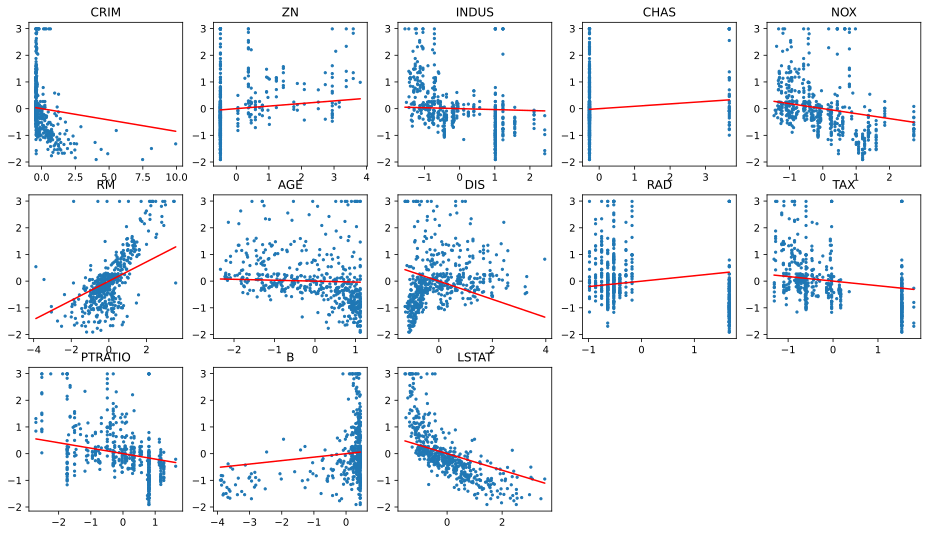

In [97]:
plt.figure(figsize=(16, 9))
plt.subplot(3, 5, 1)
i = 0
for col in boston_X.T:
  lineData = col*regr.coef_[i]
  plt.subplot(3, 5, i+1, title=boston.feature_names[i])
  plt.scatter(col, boston_Y, s=5)
  plt.plot(col, lineData, c='red')
  i+=1